# Balanced cut

## Ratio Cut

Graph cut often provide unbalanced communities, e.g., a community consisting of a single node, and another consisting of all other nodes. For example, if the network has a node with degree one (e.g., one edge), an optimal cut will be to place this node in its own community, resulting in a cut of one.

**Ratio cut** addresses this issue by introducing a normalization factor to balance the cut.
Suppose we cut the network into two communities $V_1$ and $V_2$, then the ratio cut is defined as

$$
\text{Ratio cut}(V_1, V_2) = \frac{1}{|V_1| \cdot |V_2|} \sum_{i \in V_1} \sum_{j \in V_2} A_{ij}
$$

- $|V_1|$ (or |V_2|) is the number of nodes in the community $V_1$ (or $V_2$).

The normalization factor $1/(|V_1| |V_2|)$ balances the community sizes. It's smallest when communities are equal ($|V_1| = |V_2|$) and largest when one community has only one node ($|V_1| = 1$ or $|V_2| = 1$).

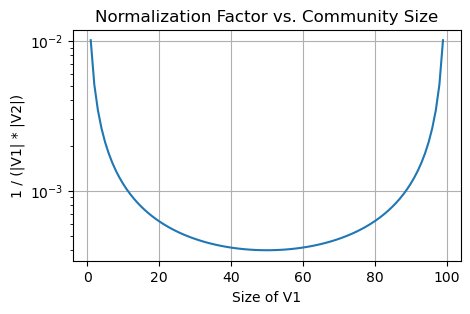

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Total number of nodes
total_nodes = 100

# Create an array of possible sizes for V1
V1_sizes = np.arange(1, total_nodes)

# Calculate corresponding sizes for V2
V2_sizes = total_nodes - V1_sizes

# Calculate the normalization factor
normalization_factor = 1 / (V1_sizes * V2_sizes)

# Create the plot
fig = plt.figure(figsize=(5, 3))
plt.plot(V1_sizes, normalization_factor)
plt.title('Normalization Factor vs. Community Size')
plt.xlabel('Size of V1')
plt.ylabel('1 / (|V1| * |V2|)')
plt.yscale('log')  # Use log scale for y-axis due to large range of values
plt.grid(True)

## Normalized cut

**Normalized cut**{footcite}`shi2000normalized` balances communities based on edge count, unlike Ratio cut which uses node count. It is defined as:

$$
\text{Normalized cut}(V_1, V_2) = \frac{1}{|E_1| \cdot |E_2|} \sum_{i \in V_1} \sum_{j \in V_2} A_{ij}
$$

- $|E_1|$ and $|E_2|$ are the number of edges in the communities $V_1$ and $V_2$, respectively.



```{admonition} Exercise
:class: tip

Compute the ratio cut and normalized cut for the following network. The red edges should be cut.

```{glue:figure} fig-graph-cut
:name: fig-graph-cut

```

```{dropdown} Click here to reveal the answer

The graph consists of two cliques, each with 5 nodes ($|V_1| = |V_2| = 5$).
Each clique has 10 internal edges and 2 edges connecting to the other clique.
Therefore, $|E_1| = |E_2| = 10 + 2 = 12$.
We can now calculate:

- **Ratio cut**: $2 / (5 \times 5) = 0.08$.
- **Normalized cut**: $2 / (12 \times 12) = 0.01388889$.

```

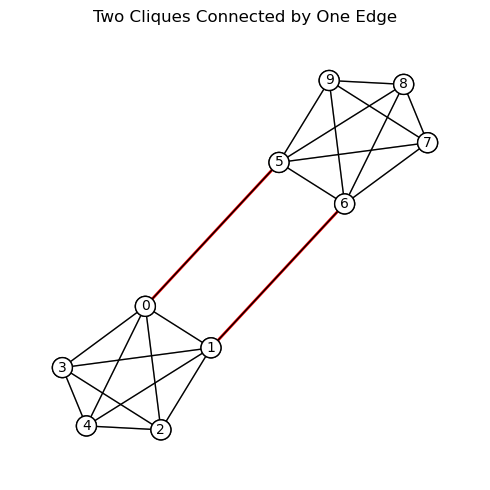

In [2]:
import igraph as ig
import matplotlib.pyplot as plt
from myst_nb import glue

# Create two cliques of size 5
G1 = ig.Graph.Full(5)
G2 = ig.Graph.Full(5)

# Combine the two cliques
G = G1 + G2

# Add an edge between the two cliques
G.add_edge(0, 5)
G.add_edge(1, 6)

# Draw the graph
layout = G.layout_fruchterman_reingold()

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the connecting edge in red
ig.plot(
    G,
    target=ax,
    layout=layout,
    vertex_color='lightblue',
    vertex_size=20,
    edge_color='gray',
    edge_width=1
)

# Draw the connecting edge in red behind the graph
ax.plot([layout[0][0], layout[5][0]], [layout[0][1], layout[5][1]], color='red', linewidth=2, zorder=0)
ax.plot([layout[1][0], layout[6][0]], [layout[1][1], layout[6][1]], color='red', linewidth=2, zorder=0)

ig.plot(
    G,
    target=ax,
    layout=layout,
    vertex_color='white',
    vertex_size=20,
    edge_color='black',
    edge_width=1
)

# Add labels to the nodes
for i, coords in enumerate(layout):
    ax.annotate(str(i), coords, ha='center', va='center')

plt.title("Two Cliques Connected by One Edge")
plt.axis('off')
plt.tight_layout()

glue("fig-graph-cut", fig, display=False)

## Cut into more than two communities

Ratio cut and Normalized cut can be extended to cut into more than two communities. Specifically, we can extend them to cut into $k$ communities, i.e., $V_1, V_2, \dots, V_k$ by defining

$$
\begin{align}
\text{Ratio cut}(V_1, V_2, \dots, V_k) &= \sum_{k=1}^K \frac{1}{|V_k|} \left(\sum_{i \in V_k} \sum_{j \notin V_{k}} A_{ij} \right) \\
\text{Normalized cut}(V_1, V_2, \dots, V_k) &= \sum_{k=1}^K \frac{1}{|E_k|} \left(\sum_{i \in V_k} \sum_{j \notin V_{k}} A_{ij} \right)
\end{align}
$$

## Algorithms to find the best cut

For both ratio and normalized cut, finding the best cut is a NP-hard problem. Yet, there are some heuristics to find a good cut.
Interested students are encouraged to refer to [Ulrike von Luxburg "A Tutorial on Spectral Clustering"](https://arxiv.org/abs/0711.0189) for more details.

## Issue of Ratio cut and Normalized cut

While Ratio cut and Normalized cut methods are clever approaches, they do come with a couple of challenges we should be aware of.

Firstly, these methods ask us to decide upfront how many communities we want to find. This can be tricky because, in real-world networks, we often don't know this number in advance. It requires us to make a guess on how many different groups of friends we have before actually looking at our social circle.

Secondly, and perhaps more critically, these methods *favor* communities of roughly the same size.
It's as if they're assuming all our friend groups should have about the same number of people.
But as we know from real life, that's not always the case.
Some of us might have a large group of college friends and a smaller group of childhood buddies.
Research has shown that in many real-world networks, communities can indeed be quite different in size {footcite}`palla2005uncovering,clauset2004finding`.

These limitations don't mean these methods should not be used, but they do remind us the importance of understanding the underlying assumptions and limitations of methods we use 😉.
It's always good to keep these points in mind when we're working with network data. 🕸️💡

```{footbibliography}
```